## OC-CCI timeseries analysis for 8-day chlor

In [2]:
%matplotlib inline
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter, YearLocator

# Data 
import netCDF4 as nc
import numpy as np
import pandas as pd

# Stats
import pymannkendall as mk
from scipy.stats import linregress

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'/Users/ben/Documents/Dissertation'

In [4]:
# NOTE: Please remember to replace my path with your path (pwd) to where your Chla data are
OC = pd.read_csv("cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D_1732033374666.csv")
OC.head(3)

,time,CHL
0,2000-01-01T00:00:00.000Z,0.156042
1,2000-01-02T00:00:00.000Z,0.150523
2,2000-01-03T00:00:00.000Z,0.146999


In [5]:
# Make a subset dataframe of the date and mean CHL for further processing
df = pd.DataFrame({'Date':OC['time'], 'Chl':OC['CHL']})

In [6]:
# Calculating STD
Std = OC['CHL'].std()

print(f"Standard deviation of Chlorophyll: {Std:.4f}")

Standard deviation of Chlorophyll: 0.1033


In [7]:
OC['Std'] = Std

In [8]:
OC.head(3)

,time,CHL,Std
0,2000-01-01T00:00:00.000Z,0.156042,0.103323
1,2000-01-02T00:00:00.000Z,0.150523,0.103323
2,2000-01-03T00:00:00.000Z,0.146999,0.103323


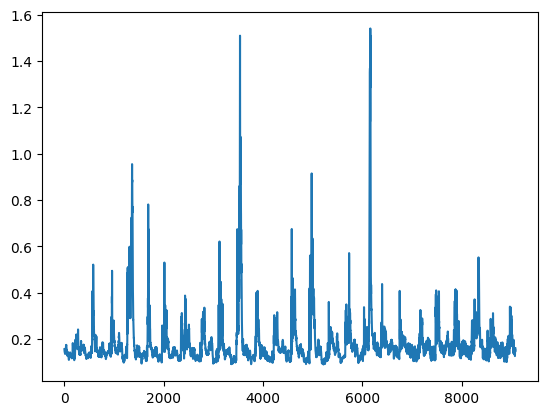

In [9]:
plt.plot(df['Chl'])

In [10]:
# Make date format more friendly to use
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT%H:%M:%S.%fZ') 
df.head(4)

,Date,Chl
0,2000-01-01,0.156042
1,2000-01-02,0.150523
2,2000-01-03,0.146999
3,2000-01-04,0.146910


In [11]:
# How many years in our timeseries:
num=df['Date'].dt.year.nunique()
num

25

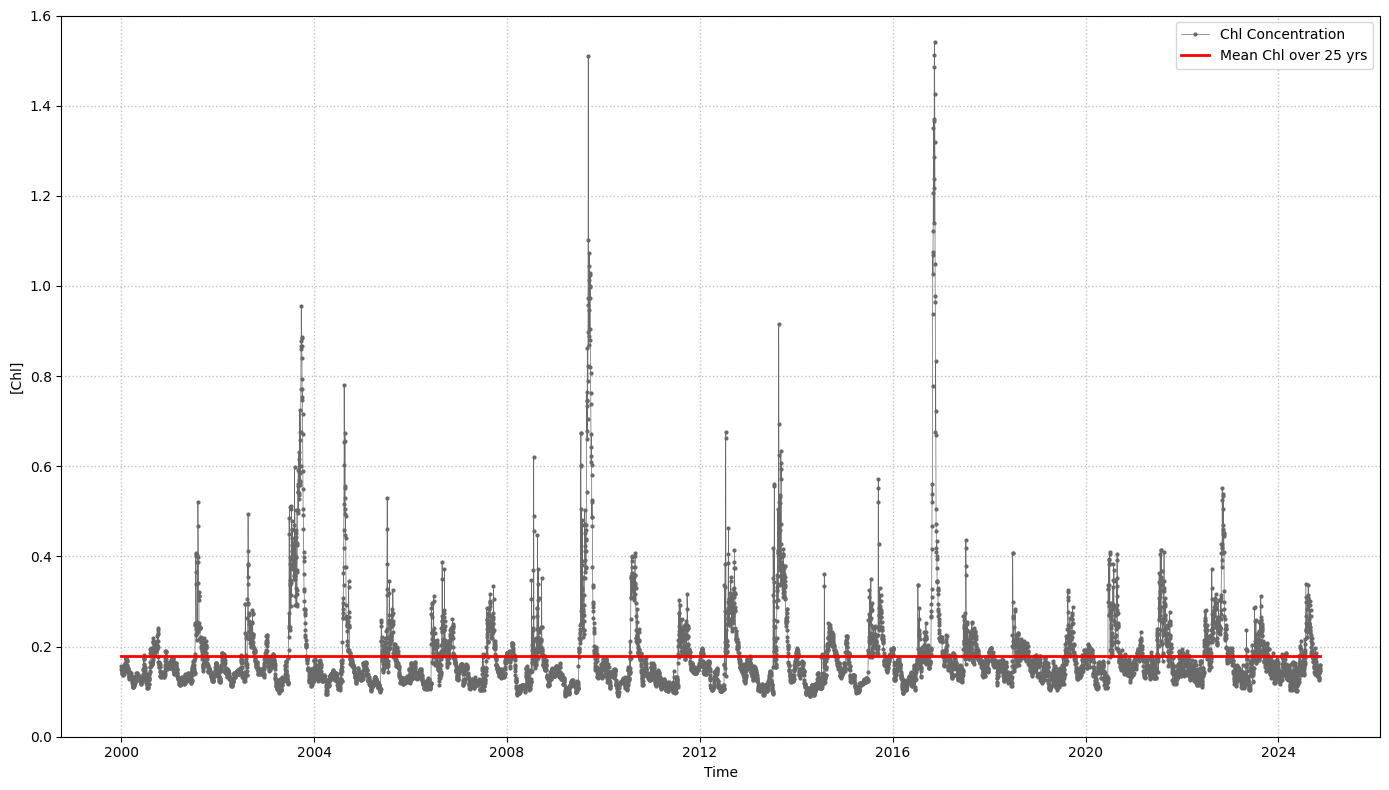

In [12]:
# Lineplot of [Chl] and Associated STD (full timeseries) with means
fig1, (ax1) = plt.subplots(1, 1, figsize=(14, 8))  # 1 row, 2 columns
#-----------------------------------------------------------------------------------------------------------
# Plot on the first axis (Chl)
ax1.plot(df['Date'], df['Chl'], linewidth=0.5, linestyle='-', marker='o', markersize=2, c='dimgrey',
         label='Chl Concentration')

# Mean [Chl] line in red on the first axis
mean_chl = np.nanmean(df['Chl'])
ax1.plot([df['Date'].min(), df['Date'].max()], [mean_chl, mean_chl], color='r', linestyle='-', linewidth=2, 
         label=f'Mean Chl over {num} yrs')
# Set y-axis limits for the first axis (Chl)
ax1.set_ylim([0, 1.6])

# Add labels and grid to the first axis
ax1.set_xlabel('Time')
ax1.set_ylabel('[Chl]')
ax1.grid(True, color='silver', linestyle=':', linewidth=1)
ax1.legend()
#-----------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()

In [13]:
# Data Prep for Linear regression:
x_date = df['Date']              # Your actual dates
x_num1 = dates.date2num(x_date)  # Convert dates to numerical format
CHL = df["Chl"]                  # Your CHL data


# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_num1, CHL)

# Calculate the trendlines
trend_CHL = slope1 * x_num1 + intercept1

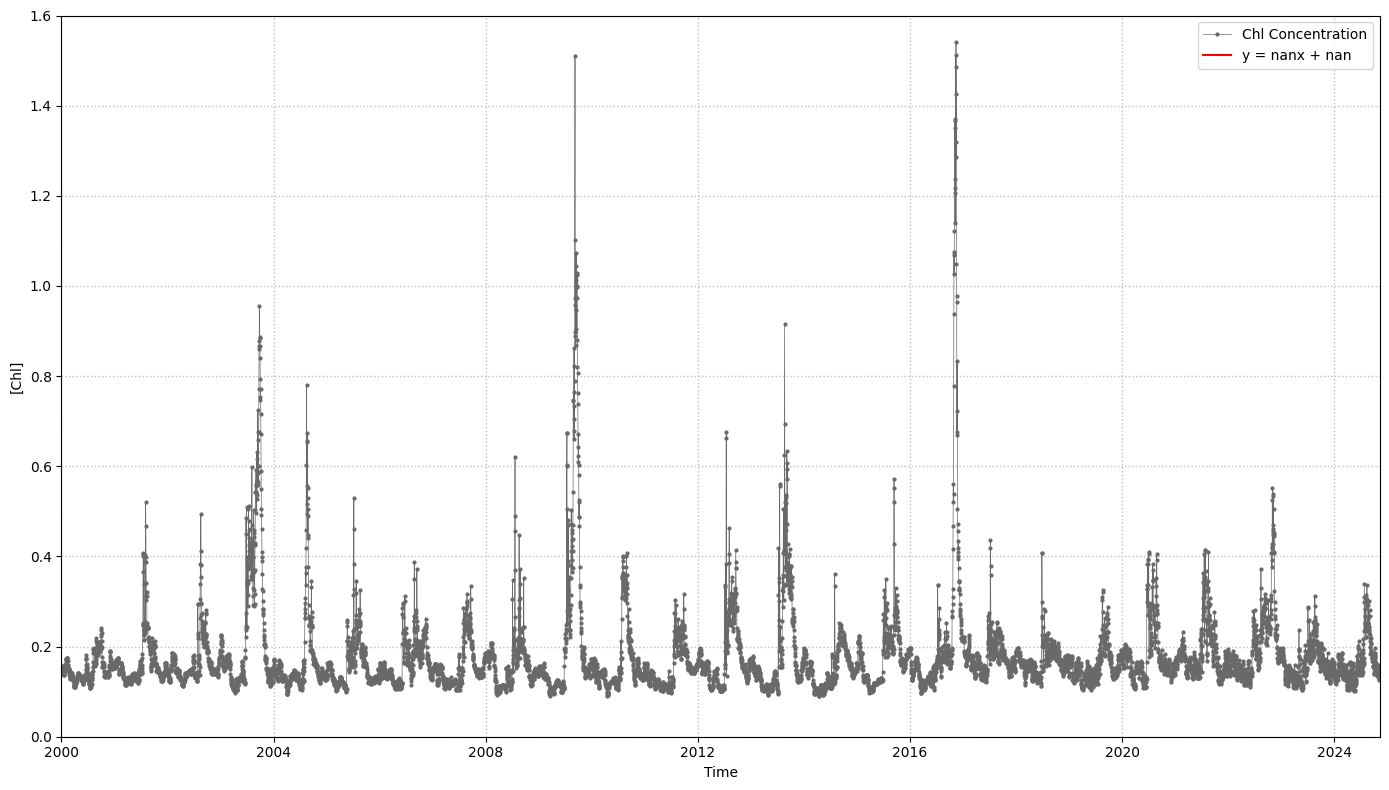

In [14]:
# Lineplot of [Chl] and Associated STD (full timeseries) with means
fig2, (ax1) = plt.subplots(1, 1, figsize=(14, 8))  # 1 row, 2 columns
#-----------------------------------------------------------------------------------------------------------
# Plot on the first axis (Chl)
ax1.plot(df['Date'], df['Chl'], linewidth=0.5, linestyle='-', marker='o', markersize=2, c='dimgrey',
         label='Chl Concentration')

# Plot trendline from linear regression
ax1.plot(x_date, trend_CHL, color='r', label=f'y = {slope1:.2f}x + {intercept1:.2f}')

# Formatting the plot nicely
ax1.set_xlim([df['Date'].min(), df['Date'].max()])
# Set y-axis limits for the first axis (Chl)
ax1.set_ylim([0, 1.6])

# Add labels and grid to the first axis
ax1.set_xlabel('Time')
ax1.set_ylabel('[Chl]')
ax1.grid(True, color='silver', linestyle=':', linewidth=1)
ax1.legend()
#-----------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()

In [15]:
# Are the trends we see significant?
trend1 = mk.original_test(df['Chl'])
print("Trend in Chlorophyll-a:",trend1[0], ", P-value =", ("%.3f" % trend1[2]))

Trend in Chlorophyll-a: increasing , P-value = 0.000


In [16]:
# Ensure 'Date' is a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Split the data into two sets: before 2011 and after (including 2011)
df_Be = df[df['Date'] < '2010-12-31']
df_Af = df[(df['Date'] >= '2011-01-01') & (df['Date'] < '2024-01-01')]
 
# Reset the index for DF after 2011
df_Af = df_Af.reset_index(drop=True)

# Display the two datasets
print("Data before 2011:")
print(df_Be.head(3))

print("\nData from 2011 onwards:")
print(df_Af.tail(3))

Data before 2011:
        Date       Chl
0 2000-01-01  0.156042
1 2000-01-02  0.150523
2 2000-01-03  0.146999

Data from 2011 onwards:
           Date       Chl
4745 2023-12-29  0.161442
4746 2023-12-30  0.166694
4747 2023-12-31  0.155686


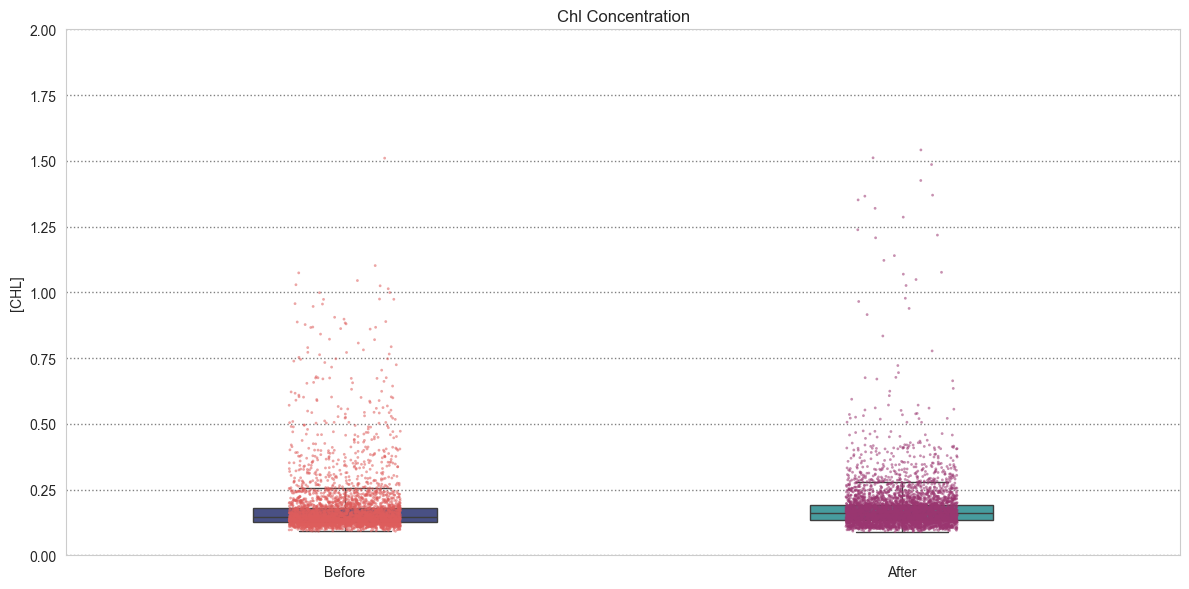

In [17]:
# Create the boxplots for 'Chl' and 'Std'
box1 = pd.DataFrame({'Before': df_Be['Chl'], 'After': df_Af['Chl']})
#box2 = pd.DataFrame({'Before': df_Be['Std'], 'After': df_Af['Std']})

# Set the overall style
sns.set_style('whitegrid')
# Create a figure with two subplots (1 row, 2 columns)
fig3, (ax1) = plt.subplots(1, 1, figsize=(12, 6))  # Adjust figsize as needed
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Chl' boxplot in the first subplot
sns.boxplot(data=box1, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax1)
sns.stripplot(data=box1, palette="flare", s=2, jitter=True, alpha=0.55, ax=ax1)

# Limits, Gridlines, Title
ax1.set_ylim([0, 2])  # Set y-limits for 'Chl'
ax1.set_ylabel('[CHL]', fontsize=10)
ax1.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
ax1.set_title('Chl Concentration')
#-----------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

In [18]:
# Significant CHL?
trend3 = mk.original_test(df_Be['Chl'])
trend4 = mk.original_test(df_Af['Chl'])
print("Trend before:",trend3[0], ", p-value =", ("%.3f" % trend3[2]))
print("Trend after:", trend4[0], ", p-value =", ("%.3f" % trend4[2]))

Trend before: decreasing , p-value = 0.036
Trend after: increasing , p-value = 0.000


In [19]:
# Assessment of Trends in CHL before and after invasions commenced:
# Before
date_be = df_Be['Date']              
x_num1 = dates.date2num(date_be)
CHL_be = df_Be['Chl'] 
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_num1, CHL_be)
# After
date_af = df_Af['Date']              
x_num2 = dates.date2num(date_af)
CHL_af = df_Af['Chl']                  
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x_num2, CHL_af)

In [37]:
print(r_value2)

0.044391693094321553


In [21]:
# Trendlines
trend_Be = slope1 * x_num1 + intercept1  
trend_Af = slope2 * x_num2 + intercept2       

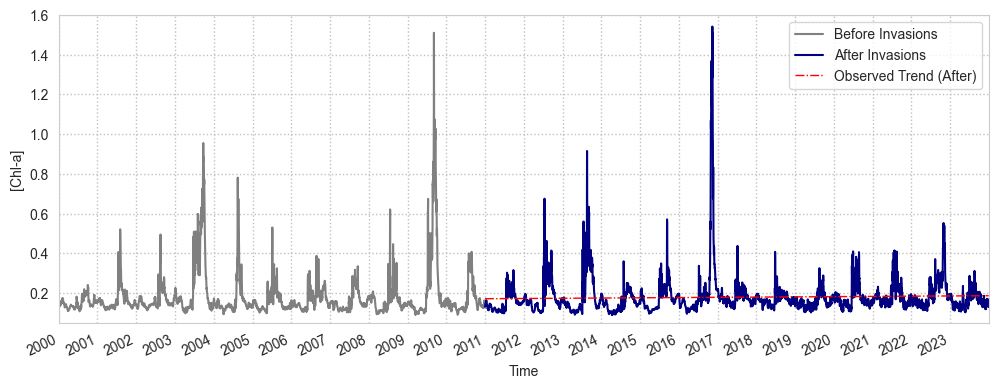

In [22]:
fig4, ax = plt.subplots(figsize=(12, 4))

# Set x-axis to show years only
ax.xaxis.set_major_locator(YearLocator(1))
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)

# Plot the 'Before' data
ax.plot(df_Be['Date'], df_Be['Chl'], linewidth=1.5, c='grey', linestyle='-', label='Before Invasions')
# Plot the 'After' data
ax.plot(df_Af['Date'], df_Af['Chl'], linewidth=1.5, c='navy', linestyle='-', label='After Invasions')

# Plot the 'After' trendline
ax.plot(dates.num2date(x_num2), trend_Af, linewidth=1.0, c='red', linestyle='-.', 
        label='Observed Trend (After)')

# Formatting the plot nicely
ax.set_xlim([df_Be['Date'].min(), df_Af['Date'].max()])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")
# Set y-axis limits for second axis (Std)
ax.set_ylim([0.05, 1.6])
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add labels to axes
ax.set_xlabel('Time')
ax.set_ylabel('[Chl-a]')

# Add a legend
ax.legend()
# Show the plot
plt.show()

fig4.savefig('TimeSeries', bbox_inches='tight')

In [23]:
# Ensure 'Date' is in datetime format
df_Be['Date'] = pd.to_datetime(df_Be['Date'])
df_Af['Date'] = pd.to_datetime(df_Af['Date'])

# Extract month from 'Date' column and calculate monthly mean for 'before' period
df_Be['Month'] = df_Be['Date'].dt.month
monthly_Be = df_Be.groupby('Month').mean()

# Extract month from 'Date' column and calculate monthly mean for 'after' period
df_Af['Month'] = df_Af['Date'].dt.month
monthly_Af = df_Af.groupby('Month').mean()

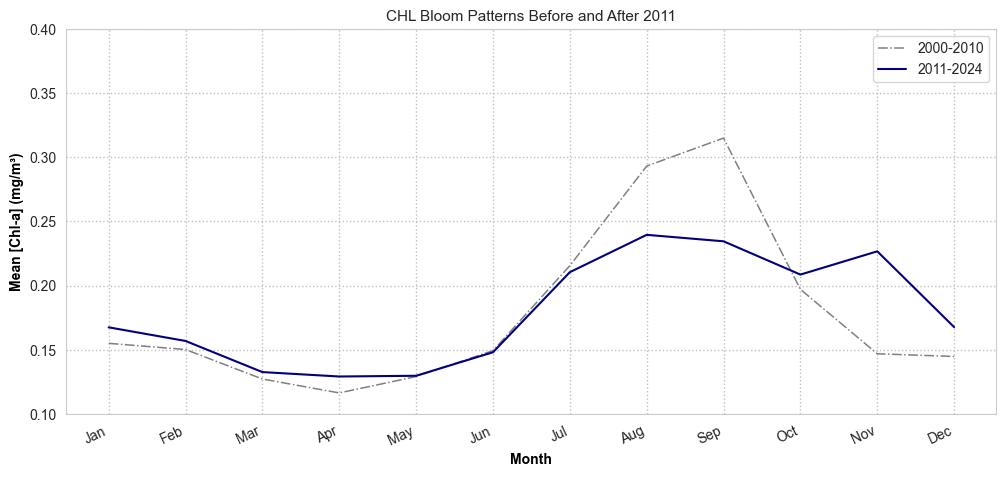

In [24]:
# Plot the seasonal patterns
fig6, ax = plt.subplots(figsize=(12, 5))

# Plot for 'before' period
ax.plot(monthly_Be.index, monthly_Be['Chl'], color='grey', linewidth=1.1,
       linestyle='-.', label='2000-2010')
# Plot for 'after' period
ax.plot(monthly_Af.index, monthly_Af['Chl'], color='navy', linewidth=1.5,
       linestyle='-', label='2011-2024')

# Add labels and title
ax.set_xlabel('Month', fontweight='bold', c='k', fontsize=10)
ax.set_ylabel('Mean [Chl-a] (mg/m\u00b3)', fontweight='bold', c='k', fontsize=10)
ax.set_title('CHL Bloom Patterns Before and After 2011',fontsize=11)

# Set x-ticks to show months (1-12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")

# Set y-axis limits
ax.set_ylim([0.1, 0.4])
# Add gridlines
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add a legend
ax.legend()
# Show the plot
plt.show()

In [25]:
fig6.savefig('Seasonal Cycle', bbox_inches='tight')

In [26]:
print (monthly_Be[['Chl']])
print (monthly_Af[['Chl']])

            Chl
Month          
1      0.155019
2      0.150204
3      0.127209
4      0.116383
5      0.129122
6      0.149312
7      0.215524
8      0.293158
9      0.314951
10     0.197081
11     0.146887
12     0.144784
            Chl
Month          
1      0.167490
2      0.156866
3      0.132616
4      0.129172
5      0.129741
6      0.148069
7      0.210469
8      0.239562
9      0.234518
10     0.208589
11     0.226719
12     0.167674


In [27]:
# Ensure 'Date' is in datetime format
df_Be['Date'] = pd.to_datetime(df_Be['Date'])
df_Af['Date'] = pd.to_datetime(df_Af['Date'])

# Calculate annual mean for Chl and Std before 2011
annual_Be = df_Be.resample('Y', on='Date').mean()
# Calculate annual mean for Chl and Std after 2011
annual_Af = df_Af.resample('Y', on='Date').mean()

# Display the results
print("Annual mean before 2011:")
print(annual_Be[['Chl']])
print("\nAnnual mean after 2011:")
print(annual_Af[['Chl']])

Annual mean before 2011:
                 Chl
Date                
2000-12-31  0.149857
2001-12-31  0.164437
2002-12-31  0.163646
2003-12-31  0.258194
2004-12-31  0.168084
2005-12-31  0.157682
2006-12-31  0.167395
2007-12-31  0.155981
2008-12-31  0.159899
2009-12-31  0.254022
2010-12-31  0.164328

Annual mean after 2011:
                 Chl
Date                
2011-12-31  0.151578
2012-12-31  0.180058
2013-12-31  0.195611
2014-12-31  0.148904
2015-12-31  0.175595
2016-12-31  0.245681
2017-12-31  0.176485
2018-12-31  0.169390
2019-12-31  0.157967
2020-12-31  0.179923
2021-12-31  0.185319
2022-12-31  0.204345
2023-12-31  0.161186


KeyError: 'Std'

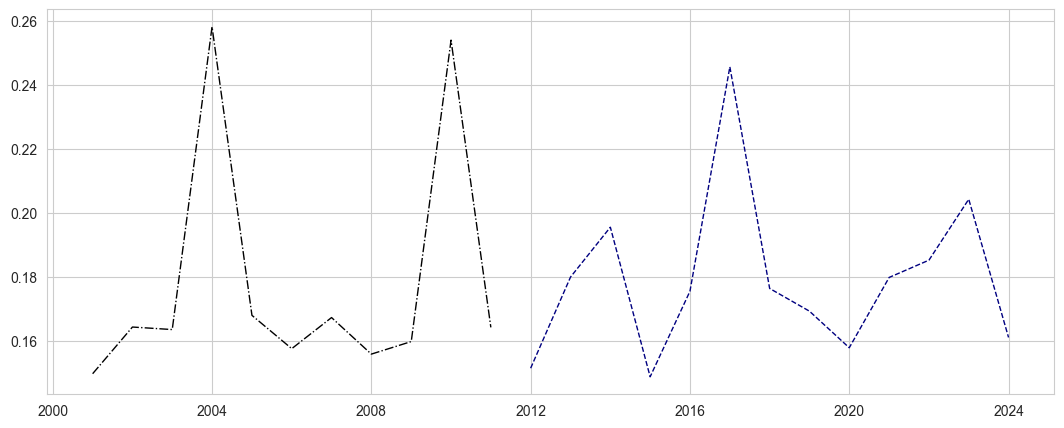

In [28]:
# Plot the annual mean Chl before and after 2011 on the same plot
fig7, ax = plt.subplots(figsize = (13, 5))

# Plot for 'before 2011'
plt.plot(annual_Be.index, annual_Be['Chl'],linewidth= 1.0, c='black', 
         linestyle = '-.', label='Before 2011')
# Plot for 'after 2011'
plt.plot(annual_Af.index, annual_Af['Chl'], linewidth = 1.0, c='navy', 
         linestyle = '--', label='After 2011')

# Plot for 'before 2011'
plt.plot(annual_Be.index, annual_Be['Std'],linewidth= 0.5, c='grey', marker='.',
         linestyle = ':', label='Std Deviation')
# Plot for 'after 2011'
plt.plot(annual_Af.index, annual_Af['Std'], linewidth = 0.5, c='blue', marker='.',
         linestyle = ':', label='Std Deviation')

# Add labels and title
ax.set_xlabel('Month', fontweight='bold', c='k', fontsize=10)
ax.set_ylabel('Mean [Chl-a]', fontweight='bold', c='k', fontsize=10)
ax.set_title('Patterns Before and After 2011',fontsize=11, c='k')

# Formatting the plot nicely
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")
# Set y-axis limits for second axis (Std)
ax.set_ylim([0.05, 0.4])
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add a legend
plt.legend()
# Show the plot
plt.show()

In [ ]:
box1 = pd.DataFrame({'Before':annual_Be['Chl'], 'After':annual_Af['Chl']})
box2 = pd.DataFrame({'Before':annual_Be['Std'], 'After':annual_Af['Std']})

# Set the overall style
sns.set_style('whitegrid')
# Create a figure with two subplots (1 row, 2 columns)
fig3, (ax1) = plt.subplots(1, 1, figsize=(12, 6))  # Adjust figsize as needed
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Chl' boxplot in the first subplot
sns.boxplot(data=box1, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax1)
sns.stripplot(data=box1, palette="flare", s=4, jitter=True, alpha=0.9, ax=ax1)

# Limits, Gridlines, Title
ax1.set_ylim([0, 0.3])  # Set y-limits for 'Chl'
ax1.set_ylabel('[CHL]', fontsize=10)
ax1.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
ax1.set_title('Chl Concentration')
#-----------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()